# Welcome!

We are going to dive into powerful universe of machine learning models. We will start with the easiest one. The idea of learning and intuition will be the same in almost all models, so make sure that you understand upcoming concept first.

## Linear model

# $$\hat{y} = w_0 + w_1x_1+ w_2x_2+ w_3x_3+ ... + w_nx_n$$ 

# $$\hat{y} = w_0 + w_1x_1$$ 

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
import ipywidgets as widgets
import andrzej

%matplotlib inline

In [5]:
x = andrzej.x
y = andrzej.y

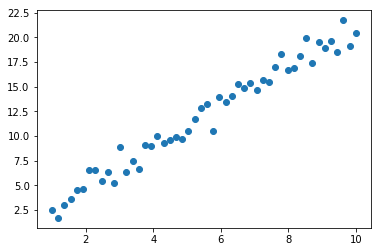

In [7]:
plt.scatter(andrzej.x, andrzej.y)
plt.show()

In [10]:
def plot_linear_model(a, b):
    y_pred = a * x + b
    plt.scatter(x, y)
    plt.plot(x, y_pred, 'r')
    plt.xlim([-1, 11])
    plt.ylim([-2, 22])
    plt.show()

In [11]:
interact(plot_linear_model, a=(-5.0, 5.0), b=(-5.0,5.0))

A Jupyter Widget

<function __main__.plot_linear_model>

# Cost function

# $$L = \frac{1}{N}\sum_{i=0}^N(\hat{y} - y)^2$$

In [52]:
def cost(x, y, w_0, w_1):
    # TO BE IMPLEMENTED


SyntaxError: unexpected EOF while parsing (<ipython-input-52-5c1ed6cdb99f>, line 2)

In [17]:
cost = andrzej.cost

In [18]:
interact(andrzej.cost, w_0=(-5.0, 5.0), w_1=(-5.0, 5.0), x=fixed(x), y=fixed(y))

/home/unj/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


A Jupyter Widget

<function andrzej.cost>

In [40]:
def gradient_step(x, y, w_0, w_1, alpha=0.01):
    # TO BE IMPLEMENTED


In [14]:
andrzej.gradient_step(x, y, 1, 2)

(1.000208432404105, 2.007629304546465)

In [15]:
def gradient_descent(x, y, w_0=0.0, w_1=0.0, alpha=0.001, steps=1000, history=True):
    w_history = [(w_0, w_1)]
    for i in range(steps):
        if i%100 == 0:
            print("Current cost: ", cost(x, y, w_0, w_1))
        
        w_0, w_1 = gradient_step( x, y, w_0, w_1,alpha)
        w_history.append((w_0, w_1))
    if not history:
        return w_0, w_1
    else:
        return w_0, w_1, w_history

In [16]:
w_0, w_1, history = gradient_descent(x, y, steps=20, history=True)

NameError: name 'cost' is not defined

In [44]:
def plot_gradient_descent(idx, history):
    w_0, w_1 = history[idx]
    y = w_1 * x + w_0
    plt.scatter(x, y_noised)
    plt.plot(x, y, 'r')
    plt.xlim([-1, 11])
    plt.ylim([-2, 22])
    plt.show()

In [45]:
interact(plot_gradient_descent, idx=(0, len(history)-1), history=fixed(history))

A Jupyter Widget

<function __main__.plot_gradient_descent>